In [2]:
import numpy as np

## <font color = green> Problem 26: Reciprocal cycles


<p>A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:</p>
<blockquote>
<table><tr><td><sup>1</sup>/<sub>2</sub></td><td>= </td><td>0.5</td>
</tr><tr><td><sup>1</sup>/<sub>3</sub></td><td>= </td><td>0.(3)</td>
</tr><tr><td><sup>1</sup>/<sub>4</sub></td><td>= </td><td>0.25</td>
</tr><tr><td><sup>1</sup>/<sub>5</sub></td><td>= </td><td>0.2</td>
</tr><tr><td><sup>1</sup>/<sub>6</sub></td><td>= </td><td>0.1(6)</td>
</tr><tr><td><sup>1</sup>/<sub>7</sub></td><td>= </td><td>0.(142857)</td>
</tr><tr><td><sup>1</sup>/<sub>8</sub></td><td>= </td><td>0.125</td>
</tr><tr><td><sup>1</sup>/<sub>9</sub></td><td>= </td><td>0.(1)</td>
</tr><tr><td><sup>1</sup>/<sub>10</sub></td><td>= </td><td>0.1</td>
</tr></table></blockquote>
<p>Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that <sup>1</sup>/<sub>7</sub> has a 6-digit recurring cycle.</p>
<p>Find the value of <i>d</i> &lt; 1000 for which <sup>1</sup>/<sub><i>d</i></sub> contains the longest recurring cycle in its decimal fraction part.</p>


Probably needs modular arithmetic: see https://en.wikipedia.org/wiki/Repeating_decimal#Fractions_with_prime_denominators, https://en.wikipedia.org/wiki/Primitive_root_modulo_n,
https://en.wikipedia.org/wiki/Euler%27s_totient_function,
https://en.wikipedia.org/wiki/Multiplicative_order

In [229]:
def find_reciprocal_cycle(d):
    digits = []
    cur_numer = 1
    pos = 0
    
    rem_inds = np.zeros(d)
    
    while rem_inds[cur_numer] == 0 and cur_numer != 0:
        rem_inds[cur_numer] = pos
        cur_numer *= 10
        cur_numer %= d
        pos += 1
    
    return np.count_nonzero(rem_inds)

In [230]:
find_reciprocal_cycle(983)

982

## <font color = green> Problem 28: Number spiral diagonals

<p>Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:</p>
<p style="text-align:center;font-family:'courier new';"><span style="color:#ff0000;font-family:'courier new';"><b>21</b></span> 22 23 24 <span style="color:#ff0000;font-family:'courier new';"><b>25</b></span><br />
20  <span style="color:#ff0000;font-family:'courier new';"><b>7</b></span>  8  <span style="color:#ff0000;font-family:'courier new';"><b>9</b></span> 10<br />
19  6  <span style="color:#ff0000;font-family:'courier new';"><b>1</b></span>  2 11<br />
18  <span style="color:#ff0000;font-family:'courier new';"><b>5</b></span>  4  <span style="color:#ff0000;font-family:'courier new';"><b>3</b></span> 12<br /><span style="color:#ff0000;font-family:'courier new';"><b>17</b></span> 16 15 14 <span style="color:#ff0000;font-family:'courier new';"><b>13</b></span></p>
<p>It can be verified that the sum of the numbers on the diagonals is 101.</p>
<p>What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?</p>


In [245]:
cur_num_side_els = 1
cur_num = 1
cur_diff = 2
cur_sum = cur_num
target_num_side_els = 1001
while cur_num_side_els < target_num_side_els:
    cur_spiral = [cur_num + cur_diff*n for n in range(1,5)]
    cur_diff += 2
    cur_num = cur_spiral[-1]
    cur_sum += sum(cur_spiral)
    cur_num_side_els += 2

print(cur_sum)

669171001


## <font color = green> Problem 29: Distinct powers

<p>Consider all integer combinations of <i>a</i><sup><i>b</i></sup> for 2 ≤ <i>a</i> ≤ 5 and 2 ≤ <i>b</i> ≤ 5:</p>
<blockquote>2<sup>2</sup>=4, 2<sup>3</sup>=8, 2<sup>4</sup>=16, 2<sup>5</sup>=32<br />
3<sup>2</sup>=9, 3<sup>3</sup>=27, 3<sup>4</sup>=81, 3<sup>5</sup>=243<br />
4<sup>2</sup>=16, 4<sup>3</sup>=64, 4<sup>4</sup>=256, 4<sup>5</sup>=1024<br />
5<sup>2</sup>=25, 5<sup>3</sup>=125, 5<sup>4</sup>=625, 5<sup>5</sup>=3125<br /></blockquote>
<p>If they are then placed in numerical order, with any repeats removed, we get the following sequence of 15 distinct terms:</p>
<p style="text-align:center;">4, 8, 9, 16, 25, 27, 32, 64, 81, 125, 243, 256, 625, 1024, 3125</p>
<p>How many distinct terms are in the sequence generated by <i>a</i><sup><i>b</i></sup> for 2 ≤ <i>a</i> ≤ 100 and 2 ≤ <i>b</i> ≤ 100?</p>


**Solution**:

**Can't use numpy**

It seems one cannot use numpy power function here, as it returns garbage value once the value starts exceeding its int limits. This is not a problem with the regular python power function.

In [55]:
low_lim = 2
up_lim = 100

In [56]:
bases = [a for a in range(low_lim,up_lim + 1) for b in range(low_lim, up_lim + 1)]
pows = [b for a in range(low_lim,up_lim+1) for b in range(low_lim,up_lim+1)]

In [57]:
pow(2,10)

1024

In [58]:
len(set([pow(a,b) for a, b in zip(bases,pows)]))

9183

Numpy based wrong answer:

In [41]:
len(list(set(np.power(bases,pows))))

6413

In [42]:
np.power(2,100)

0

In [45]:
np.power(2,50)

1125899906842624

In [48]:
2**100

1267650600228229401496703205376

## <font color = green> Problem 30: Digit fifth powers

<p>Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits:</p>
<blockquote>1634 = 1<sup>4</sup> + 6<sup>4</sup> + 3<sup>4</sup> + 4<sup>4</sup><br />
8208 = 8<sup>4</sup> + 2<sup>4</sup> + 0<sup>4</sup> + 8<sup>4</sup><br />
9474 = 9<sup>4</sup> + 4<sup>4</sup> + 7<sup>4</sup> + 4<sup>4</sup></blockquote>
<p class="info">As 1 = 1<sup>4</sup> is not a sum it is not included.</p>
<p>The sum of these numbers is 1634 + 8208 + 9474 = 19316.</p>
<p>Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.</p>


**Solution**:

Brute force? There's probably a limit to how many digits you can have before it becomes too many for this to be true. For sum of fourth powers, the maximum number for which this could be true is probably 9^5. Similarly, max number sum of fifth powers should be 9^6.

In [63]:
9**5

59049

In [76]:
cur_pow = 5
max_lim = 9**(cur_pow+1)
min_lim = 100


In [77]:
true_nums = []
for i in range(min_lim, max_lim):
    sum_pows = sum([int(d)**cur_pow for d in str(i)])
    if i == sum_pows:
        true_nums.append(i)

In [78]:
true_nums

[4150, 4151, 54748, 92727, 93084, 194979]

In [79]:
np.sum(true_nums)

443839

## <font color = green> Problem 31: Coin sums

<p>In the United Kingdom the currency is made up of pound (£) and pence (p). There are eight coins in general circulation:</p>
<blockquote>1p, 2p, 5p, 10p, 20p, 50p, £1 (100p), and £2 (200p).</blockquote>
<p>It is possible to make £2 in the following way:</p>
<blockquote>1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p</blockquote>
<p>How many different ways can £2 be made using any number of coins?</p>


In [248]:
2*3*5*11*21*41*101

28697130

In [257]:
target = 200
coinSizes = [1, 2, 5, 10, 20, 50, 100, 200]
ways = [0]*(target+1)
ways[0] = 1
 
for i in range(len(coinSizes)):
    for j in range(coinSizes[i], target+1):
        ways[j] += ways[j - coinSizes[i]]


In [259]:
ways[-1]

73682

## <font color = green> Problem 32: Pandigital products

<p>We shall say that an <var>n</var>-digit number is pandigital if it makes use of all the digits 1 to <var>n</var> exactly once; for example, the 5-digit number, 15234, is 1 through 5 pandigital.</p>

<p>The product 7254 is unusual, as the identity, 39 × 186 = 7254, containing multiplicand, multiplier, and product is 1 through 9 pandigital.</p>

<p>Find the sum of all products whose multiplicand/multiplier/product identity can be written as a 1 through 9 pandigital.</p>

<div class="note">HINT: Some products can be obtained in more than one way so be sure to only include it once in your sum.</div>


**Solution**:

One could have a product x*y=z. 

If taken together, x, y, and z have all 9 digits from 1-9, then:
- z should have 4 digits (having 5 digits would mean only 4 digits are left for both x and y - which is not possible, and 3 digits is also not possible, since then one of x or y would have to have 3 digits, multiplied by a number with 2 digits)
- if either x or y have 1 digit, then the other must have 4 digits. 
- if either x or y have 2 digits, then the other must have 3 digits.


**Case 1**: x or y have 2 digits

first we get eligible 2 and 3 digit numbers - basically numbers which have unique digits

In [85]:
nums_2 = [x for x in range(12,100) if (len(set([int(c) for c in str(x)])) == 2) & ('0' not in str(x))]

In [87]:
nums_3 = [x for x in range(123,987) if (len(set([int(c) for c in str(x)])) == 3) & ('0' not in str(x))]

In [105]:
pan_dig_23 = [x*y for x in nums_2 for y in nums_3 if (len(set([int(c) for c in str(x) + str(y) + str(x*y)])) == len(str(x) + str(y) + str(x*y))) & ('0' not in str(x*y))]

In [106]:
pan_dig_23

[5796, 5346, 5346, 4396, 7254, 5796, 7632]

**Case 2**: x or y have 1 digits

In [107]:
nums_4 = [x for x in range(1234,9876) if (len(set([int(c) for c in str(x)])) == 4) & ('0' not in str(x))]

In [108]:
nums_1 = list(range(1,10))

In [109]:
pan_dig_14 = [x*y for x in nums_1 for y in nums_4 if (len(set([int(c) for c in str(x) + str(y) + str(x*y)])) == len(str(x) + str(y) + str(x*y))) & ('0' not in str(x*y))]

In [110]:
pan_dig_14

[6952, 7852]

In [111]:
sum(list(set(pan_dig_23 + pan_dig_14)))

45228

## <font color = green> Problem 33: Digit canceling fractions

**Digit cancelling fractions**
<p>The fraction <sup>49</sup>/<sub>98</sub> is a curious fraction, as an inexperienced mathematician in attempting to simplify it may incorrectly believe that <sup>49</sup>/<sub>98</sub> = <sup>4</sup>/<sub>8</sub>, which is correct, is obtained by cancelling the 9s.</p>
<p>We shall consider fractions like, <sup>30</sup>/<sub>50</sub> = <sup>3</sup>/<sub>5</sub>, to be trivial examples.</p>
<p>There are exactly four non-trivial examples of this type of fraction, less than one in value, and containing two digits in the numerator and denominator.</p>
<p>If the product of these four fractions is given in its lowest common terms, find the value of the denominator.</p>

In [1]:
import math

In [3]:
math.gcd(49,98)

49

In [4]:
no_zero_nums = [num for num in range(11,99) if '0' not in str(num)]

In [10]:
all_fracs = [str(num) + '/' + str(den) for num in no_zero_nums for den in no_zero_nums if den > num]

In [17]:
a = set(c for c in '12').intersection(set(c for c in '15'))

In [21]:
len(a)

1

In [27]:
def cancel_digits(num, den):
    digits_num = [c for c in num]
    digits_den = [c for c in den]
    
    common_dig = list(set(digits_num).intersection(set(digits_den)))
    
    if len(common_dig) > 0:
        digits_num.remove(common_dig[0])
        digits_den.remove(common_dig[0])
    
    return ''.join([x for x in digits_num]), ''.join([x for x in digits_den])
    

In [35]:
cancel_digits('11','66')

('11', '66')

In [36]:
def check_digit_cancel(frac):
    num, den = frac.split('/')
    red_num, red_den = cancel_digits(num, den)
    if red_num == num:
        return False
    else:
        return (int(num)/int(den) == int(red_num)/int(red_den))

In [41]:
all_cancel_frac = [frac for frac in all_fracs if check_digit_cancel(frac)]

In [46]:
all_cancel_frac

['16/64', '19/95', '26/65', '49/98']

In [47]:
16*19*26*49

387296

In [48]:
num_prod = 1
den_prod = 1
for frac in all_cancel_frac:
    cur_num, cur_den = frac.split('/')
    num_prod *= int(cur_num)
    den_prod *= int(cur_den)

In [51]:
den_prod

38729600

In [50]:
math.gcd(num_prod,den_prod)

387296

Answer is 100

## <font color = green> Problem 34: Digit factorials

<p>145 is a curious number, as 1! + 4! + 5! = 1 + 24 + 120 = 145.</p>
<p>Find the sum of all numbers which are equal to the sum of the factorial of their digits.</p>
<p class="info">Note: as 1! = 1 and 2! = 2 are not sums they are not included.</p>

In [20]:
import math
import matplotlib.pyplot as plt

In [10]:
math.factorial(9)

362880

There are 10 digits, from 0-9. The number must be a combination of the factorials of these 10 digits. Each factorial value can be repeated some x times

In [11]:
fact_vals = [math.factorial(x) for x in range(0,10)]

In [12]:
fact_vals

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

In [13]:
def sum_fact_digit(num):
    return sum([math.factorial(int(x)) for x in str(num)])

In [14]:
sum_fact_digit(145)

145

### Brute force way: Plotting to the answer

Main trick is to get maximum number for which this could be true. Then brute force method is good enough. Plotting numbers against sum of factorial of digits should give some idea.

In [28]:
plt.rcParams['figure.figsize'] = [12,6]

In [33]:
def plot_sum_facts(max_num = int(1e3)):
    nums = list(range(0,max_num))
    sum_facts = [sum_fact_digit(i) for i in nums]
    plt.scatter(nums,sum_facts)
    plt.plot(nums,nums, color='r')

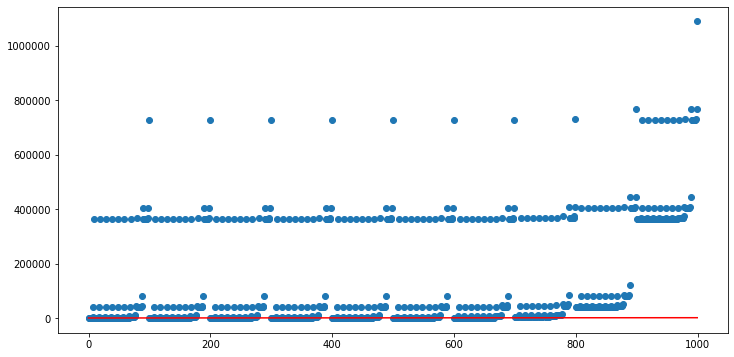

In [34]:
plot_sum_facts()

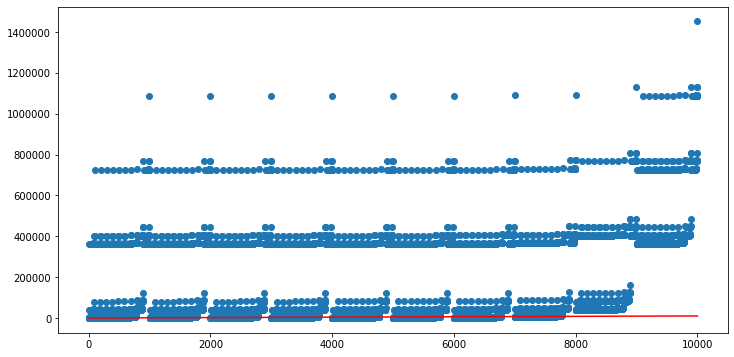

In [35]:
plot_sum_facts(int(1e4))

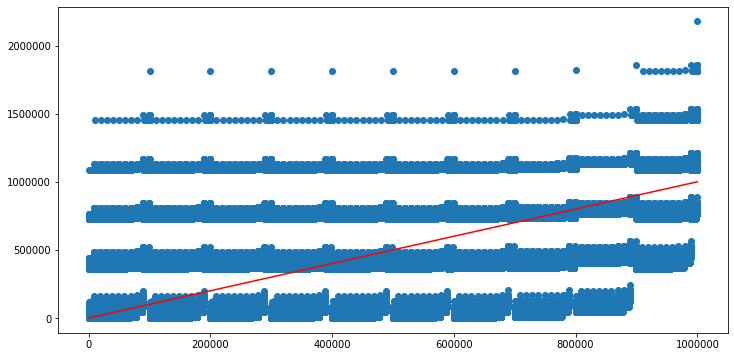

In [37]:
plot_sum_facts(int(1e6))

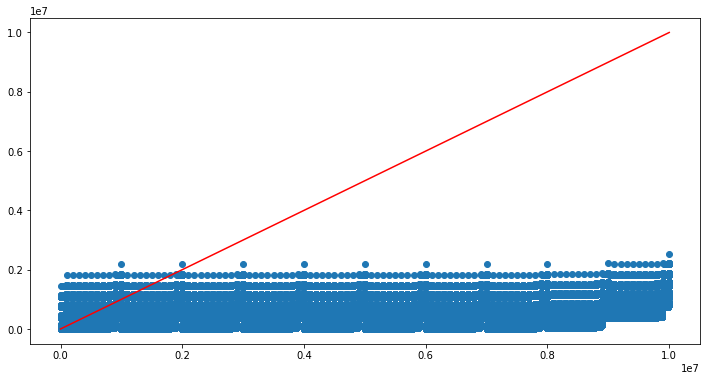

In [38]:
plot_sum_facts(int(1e7))

looking at graph, it seems max_num should be around 2.5e6

In [44]:
def get_curious_nums(max_num):
    nums = list(range(0,max_num))
    return [i for i in nums if sum_fact_digit(i) == i]

In [48]:
get_curious_nums(int(2.5e5))

[1, 2, 145, 40585]

In [51]:
sum(get_curious_nums(int(2.5e6)))

40733

since 1 and 2 are excluded, 40730 is the answer

## <font color = green> Problem 35: Circular primes

<p>The number, 197, is called a circular prime because all rotations of the digits: 197, 971, and 719, are themselves prime.</p>
<p>There are thirteen such primes below 100: 2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, and 97.</p>
<p>How many circular primes are there below one million?</p>

### Sieve of Eratosthenes

<p>Following is the algorithm to find all the prime numbers less than or equal to a given integer <em>n</em> by Eratosthenes&#8217; method:</p>
<ol>
<li>Create a list of consecutive integers from 2 to <em>n</em>: (2, 3, 4, &#8230;, <em>n</em>).</li>
<li>Initially, let <em>p</em> equal 2, the first prime number.</li>
<li>Starting from <em>p</em><sup>2</sup>, count up in increments of <em>p</em> and mark each of these numbers greater than or equal to <em>p<sup>2</sup></em> itself in the list. These numbers will be <em>p(p+1)</em>, <em>p(p+2)</em>, <em>p(p+3)</em>, etc..<!-- note that some of them may have already been marked. --></li>
<li>Find the first number greater than <em>p</em> in the list that is not marked. If there was no such number, stop. Otherwise, let <em>p</em> now equal this number (which is the next prime), and repeat from step 3.</li>
</ol>
<br/><div id="AP_G4GR_5"></div><br/>
<p>When the algorithm terminates, all the numbers in the list that are not marked are prime.
</p>

In [23]:
import numpy as np

In [2]:
def sieve_eratosthenes(n):
    all_nums = np.array(range(2,n))
    p = 2
    while p < n:
        for i in range(p**2,n,p):
            all_nums[i-2] = 0
        next_num = all_nums[all_nums > p]
        if len(next_num) > 0:
            p = next_num[0]
        else:
            break
    
    return all_nums[all_nums > 0]

### Find circular primes less than million

In [47]:
prime_lt_million = sieve_eratosthenes(int(1e6))

In [48]:
len(prime_lt_million)

78498

In [102]:
prime_lt_million[-1]

999983

In [90]:
def check_circular(n,prime_list):
    n = str(n)
    circ_n = [int(n)]
    if len(n) > 1:
        for i in range(1,len(n)):
            n = n[-1] + n[:-1]
            circ_n.append(int(n))
    return set(circ_n).issubset(prime_list)

In [103]:
check_circular(prime_lt_million[-1],prime_lt_million)

False

In [98]:
prime_lt_1k = sieve_eratosthenes(int(1e3))

In [104]:
all_circ_primes = [i for i in prime_lt_million if check_circular(i,prime_lt_million)]

In [105]:
len(all_circ_primes)

55

## <font color = green> Problem 36: Double-based palindromes


<p>The decimal number, 585 = 1001001001<sub>2</sub> (binary), is palindromic in both bases.</p>
<p>Find the sum of all numbers, less than one million, which are palindromic in base 10 and base 2.</p>
<p class="info">(Please note that the palindromic number, in either base, may not include leading zeros.)</p>


In [134]:
n = int(1e6)

all_nums_str = [str(num) for num in range(1,n)]

all_nums_str_b10 = [format(num,'b') for num in range(1,n)]

dbl_palindromes = [int(str_num) for str_num, str_num_b10 in zip(all_nums_str, all_nums_str_b10) if (str_num == str_num[::-1]) and str_num_b10 == str_num_b10[::-1]]

In [136]:
sum(dbl_palindromes)

872187

## <font color= green> Problem 37: Truncatable primes

<p>The number 3797 has an interesting property. Being prime itself, it is possible to continuously remove digits from left to right, and remain prime at each stage: 3797, 797, 97, and 7. Similarly we can work from right to left: 3797, 379, 37, and 3.</p>
<p>Find the sum of the only eleven primes that are both truncatable from left to right and right to left.</p>
<p class="info">NOTE: 2, 3, 5, and 7 are not considered to be truncatable primes.</p>


In [31]:
def check_truncatable(prime_num, list_of_primes):
    digs = [d for d in str(prime_num)]
    left_nums = [int(''.join(digs[i+1:])) for i in range(len(digs)-1)]
    right_nums = [int(''.join(digs[:len(digs)-i-1])) for i in range(len(digs)-1)]
    
     
    return set(left_nums + right_nums).issubset(set(list_of_primes))
    

In [40]:
primes = sieve_eratosthenes(int(1e6))

In [41]:
trunc_lt_1e6 = [prime for prime in primes if check_truncatable(prime, primes)]

In [46]:
trunc_lt_1e6

[2, 3, 5, 7, 23, 37, 53, 73, 313, 317, 373, 797, 3137, 3797, 739397]

In [45]:
sum(trunc_lt_1e6[4:])

748317

## Problem 38: Pandigital multiples

<p>Take the number 192 and multiply it by each of 1, 2, and 3:</p>
<blockquote>192 × 1 = 192<br />
192 × 2 = 384<br />
192 × 3 = 576</blockquote>
<p>By concatenating each product we get the 1 to 9 pandigital, 192384576. We will call 192384576 the concatenated product of 192 and (1,2,3)</p>
<p>The same can be achieved by starting with 9 and multiplying by 1, 2, 3, 4, and 5, giving the pandigital, 918273645, which is the concatenated product of 9 and (1,2,3,4,5).</p>
<p>What is the largest 1 to 9 pandigital 9-digit number that can be formed as the concatenated product of an integer with (1,2, ... , <var>n</var>) where <var>n</var> &gt; 1?</p>


In [58]:
def check_pandig(num, n):
    prods = [num*i for i in range(1,n+1)]
    
    for ind, prod in enumerate(prods):
        concat_prod = ''.join(str(x) for x in prods[:ind+1])
        digs_concat = [int(c) for c in concat_prod]
        
        if (set(digs_concat) == set(range(1,10))) and (len(digs_concat) == 9):
            return True, int(concat_prod), ind+1
        
    return  False, int(concat_prod), None

In [61]:
check_pandig(9, 7)

(True, 918273645, 5)

n shouldn't be more than 9. so for a brute force method, question is how large can the integer be?

at worst, probably not more than 1e5

In [67]:
largest_pan_num = 0
for num in range(2, int(1e5)):
    is_pandig, pan_num, n = check_pandig(num, 9)
    if (is_pandig):
        print(num, n)
        if pan_num > largest_pan_num:
            largest_pan_num = pan_num

print(largest_pan_num)

9 5
192 3
219 3
273 3
327 3
6729 2
6792 2
6927 2
7269 2
7293 2
7329 2
7692 2
7923 2
7932 2
9267 2
9273 2
9327 2
932718654


Answer is 932718654

## Problem 39: Integer right triangles

<p>If <i>p</i> is the perimeter of a right angle triangle with integral length sides, {<i>a</i>,<i>b</i>,<i>c</i>}, there are exactly three solutions for <i>p</i> = 120.</p>
<p>{20,48,52}, {24,45,51}, {30,40,50}</p>
<p>For which value of <i>p</i> ≤ 1000, is the number of solutions maximised?</p>

Solution:

The following conditions should hold:


1. $a^2 + b^2 = c^2$

2. $a+b+c = p$

3. $a,b,c,p \in \mathbb{N}$

4. Sum of any two sides should be greater than third side, so $a+b > c$, $b +c > a$ and $a+c > b$

So for searching for $a,b,c$ question is how large can $a, b$ be for $p \le 1000$. Once that is determined, one just has to look through all combinations of $a^2, b^2$ which result in $c^2$, i.e., result in the square of an integer.

From condition 4, $a,b$ should never be larger than 500, for $p \le 1000$. There is probably a more restrictive condition.

In [23]:
import gmpy2 as gmpy

In [43]:
import numpy as np
import math

In [10]:
type(np.square(range(1,4))[0])

numpy.int64

In [58]:
def find_num_int_triangles(p):
    max_side = int(p/2)
    side_vals = range(1,max_side)
    
    side_squares = [x**2 for x in side_vals]
    num_sols = 0
    for a in side_vals:
        for b in side_vals:
            c_2 = a**2 + b**2
            c = math.sqrt(c_2)
            if gmpy.is_square(c_2) and (a+b+int(c) == p):
                num_sols += 1
    return int(num_sols/2)

In [62]:
max_sols = 0
max_p_val = 10
for p in range(10,1000):
    cur_num_sols = find_num_int_triangles(p)
    if cur_num_sols > max_sols:
        max_sols = cur_num_sols
        max_p_val = p

In [63]:
max_sols

8

In [64]:
max_p_val

840

## Problem 40: Champernowne's constant

<p>An irrational decimal fraction is created by concatenating the positive integers:</p>
<p style="text-align:center;">0.12345678910<span style="color:#dd0000;font-size:14pt;">1</span>112131415161718192021...</p>
<p>It can be seen that the 12<sup>th</sup> digit of the fractional part is 1.</p>
<p>If <i>d</i><sub><i>n</i></sub> represents the <i>n</i><sup>th</sup> digit of the fractional part, find the value of the following expression.</p>
<p style="text-align:center;"><i>d</i><sub>1</sub> × <i>d</i><sub>10</sub> × <i>d</i><sub>100</sub> × <i>d</i><sub>1000</sub> × <i>d</i><sub>10000</sub> × <i>d</i><sub>100000</sub> × <i>d</i><sub>1000000</sub></p>


In [161]:
def find_nth_dig(n):
    cur_tot_digs = 0
    max_int = 0
    num_digits = 1
    while cur_tot_digs < n:
        max_num_ints = 9*(10**(num_digits-1))
        max_num_digs = max_num_ints * num_digits
        if max_num_digs + cur_tot_digs < n:
            cur_tot_digs += max_num_digs
            num_digits += 1
            max_int += max_num_ints
        else:
            break
    extra_digs = n - cur_tot_digs
    num_n_dig_int = extra_digs // num_digits # gives number of integers above the max_int value
    if num_n_dig_int == 0:
        num_n_dig_int = (num_digits - 1)
    max_int += num_n_dig_int #-1
    dig_max_int = extra_digs % num_digits
    
    return int(str(max_int)[dig_max_int - 1])
    

In [163]:
np.prod([find_nth_dig(10**i) for i in range(7)])

210

In [159]:
find_nth_dig(10)

1

In [162]:
[find_nth_dig(i) for i in range(1,120)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 1,
 5,
 1,
 6,
 1,
 7,
 1,
 8,
 1,
 9,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 5,
 2,
 6,
 2,
 7,
 2,
 8,
 2,
 9,
 2,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 6,
 3,
 7,
 3,
 8,
 3,
 9,
 3,
 0,
 4,
 1,
 4,
 2,
 4,
 3,
 4,
 4,
 4,
 5,
 4,
 6,
 4,
 7,
 4,
 8,
 4,
 9,
 4,
 0,
 5,
 1,
 5,
 2,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 6,
 5,
 7,
 5,
 8,
 5,
 9,
 5,
 0,
 6,
 1,
 6,
 2,
 6,
 3,
 6,
 4]

In [133]:
find_nth_dig(106)

5

still some bug in the code - every 10th digit is wrong. But answer to project euler question is 210, and is correct.

## Problem 41: Pandigital prime

<p>We shall say that an <i>n</i>-digit number is pandigital if it makes use of all the digits 1 to <i>n</i> exactly once. For example, 2143 is a 4-digit pandigital and is also prime.</p>
<p>What is the largest <i>n</i>-digit pandigital prime that exists?</p>


Solution:

In [37]:
import itertools
import sympy

In [33]:
def get_pandigs_n(n):
    '''
    get all pandigital numbers of length n
    maximum value of n is 9
    '''
    if n > 9 or n < 1:
        print('n must be between 1 and 9')
        return None
    else:
        nums = [int(''.join([str(x) for x in seq])) for seq in itertools.permutations(range(1,n+1))]
    return nums

In [36]:
largest_prime = 1
for n in range(2,10):
    nums = get_pandigs_n(n)
    for num in nums:
        if sympy.isprime(num) and num > largest_prime:
            largest_prime = num
print('Largest pandigital prime: ', largest_prime)

Largest pandigital prime:  7652413


## Problem 42: Coded triangle numbers 

<p>The <i>n</i><sup>th</sup> term of the sequence of triangle numbers is given by, <i>t<sub>n</sub></i> = ½<i>n</i>(<i>n</i>+1); so the first ten triangle numbers are:</p>
<p style="text-align:center;">1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...</p>
<p>By converting each letter in a word to a number corresponding to its alphabetical position and adding these values we form a word value. For example, the word value for SKY is 19 + 11 + 25 = 55 = <i>t</i><sub>10</sub>. If the word value is a triangle number then we shall call the word a triangle word.</p>
<p>Using <a href="project/resources/p042_words.txt">words.txt</a> (right click and 'Save Link/Target As...'), a 16K text file containing nearly two-thousand common English words, how many are triangle words?</p>

In [38]:
import pandas as pd

In [49]:
with open('p042_words.txt') as f:
    words = f.read().split(',')

In [52]:
word_list = [x.replace('"','') for x in words]

In [56]:
word_list[-5:]

['YOU', 'YOUNG', 'YOUR', 'YOURSELF', 'YOUTH']

In [57]:
import string

In [61]:
letter_dict = dict(zip(string.ascii_uppercase,range(1,27)))

In [63]:
for word in word_list:
    word_val = sum(letter_dict[c] for c in word)

In [66]:
word_vals = [sum(letter_dict[c] for c in word) for word in word_list]

In [67]:
max(word_vals)

192

In [72]:
triangle_nums = [int(0.5*n*(n+1)) for n in range(1,25)]

In [73]:
max(triangle_nums)

300

In [74]:
num_triangle_words= 0
for word in word_list:
    word_val = sum(letter_dict[c] for c in word)
    if word_val in triangle_nums:
        num_triangle_words += 1

In [75]:
num_triangle_words

162

## Problem 43: Sub-string divisibility 

<p>The number, 1406357289, is a 0 to 9 pandigital number because it is made up of each of the digits 0 to 9 in some order, but it also has a rather interesting sub-string divisibility property.</p>
<p>Let <i>d</i><sub>1</sub> be the 1<sup>st</sup> digit, <i>d</i><sub>2</sub> be the 2<sup>nd</sup> digit, and so on. In this way, we note the following:</p>
<ul><li><i>d</i><sub>2</sub><i>d</i><sub>3</sub><i>d</i><sub>4</sub>=406 is divisible by 2</li>
<li><i>d</i><sub>3</sub><i>d</i><sub>4</sub><i>d</i><sub>5</sub>=063 is divisible by 3</li>
<li><i>d</i><sub>4</sub><i>d</i><sub>5</sub><i>d</i><sub>6</sub>=635 is divisible by 5</li>
<li><i>d</i><sub>5</sub><i>d</i><sub>6</sub><i>d</i><sub>7</sub>=357 is divisible by 7</li>
<li><i>d</i><sub>6</sub><i>d</i><sub>7</sub><i>d</i><sub>8</sub>=572 is divisible by 11</li>
<li><i>d</i><sub>7</sub><i>d</i><sub>8</sub><i>d</i><sub>9</sub>=728 is divisible by 13</li>
<li><i>d</i><sub>8</sub><i>d</i><sub>9</sub><i>d</i><sub>10</sub>=289 is divisible by 17</li>
</ul><p>Find the sum of all 0 to 9 pandigital numbers with this property.</p>


In [80]:
def get_pandigs_n(n):
    '''
    get all pandigital numbers of length n
    maximum value of n is 9
    numbers range from 0 to 9
    '''
    if n > 9 or n < 1:
        print('n must be between 1 and 9')
        return None
    else:
        nums = [int(''.join([str(x) for x in seq])) for seq in itertools.permutations(range(n+1)) if seq[0] != 0]
    return nums

In [82]:
pandig_nums = get_pandigs_n(9)

In [83]:
len(pandig_nums)

3265920

In [84]:
divisors = [2,3,5,7,11,13,17]

In [112]:
def get_slices(num):
    num = str(num)
    slices = []
    for i in range(1,len(num)-2):
        slices.append(int(num[i:i+3]))
    
    return slices

In [113]:
pandig_nums[0]

1023456789

In [114]:
get_slices(pandig_nums[0])

[23, 234, 345, 456, 567, 678, 789]

In [115]:
len(get_slices(pandig_nums[0]))

7

In [116]:
len(divisors)

7

In [133]:
sum([pandig_num for pandig_num in pandig_nums
 if all([sub_num % div == 0 for sub_num, div in zip(get_slices(pandig_num),divisors)])])

16695334890

## Problem 44: Pentagonal numbers

<p>Pentagonal numbers are generated by the formula, P<sub><var>n</var></sub>=<var>n</var>(3<var>n</var>−1)/2. The first ten pentagonal numbers are:</p>
<p style="text-align:center;">1, 5, 12, 22, 35, 51, 70, 92, 117, 145, ...</p>
<p>It can be seen that P<sub>4</sub> + P<sub>7</sub> = 22 + 70 = 92 = P<sub>8</sub>. However, their difference, 70 − 22 = 48, is not pentagonal.</p>
<p>Find the pair of pentagonal numbers, P<sub><var>j</var></sub> and P<sub><var>k</var></sub>, for which their sum and difference are pentagonal and D = |P<sub><var>k</var></sub> − P<sub><var>j</var></sub>| is minimised; what is the value of D?</p>

In [2]:
p_n = lambda n: n*(3*n-1)/2

In [4]:
p_n(10)

145.0

we can assume $k > j$ always. Then, we can say $k-j = a$.

In that case, $D$ is given as a function of $a$ by:

$D(a) = \frac{a*(3a+2j-1)}{2}$

So, for a given $P_k$, we can search using successively increasing value of $a$, checking if $P_k - D(a)$ is some pentagonal number $P_j$, and if $D(a)$ is also pentagonal.

In [10]:
max_k = int(1e6)
list_of_nums = [p_n(k) for k in range(1,max_k)]

In [11]:
list_of_nums[:5]

[1.0, 5.0, 12.0, 22.0, 35.0]

In [42]:
import math

In [43]:
math.sqrt(2)

1.4142135623730951

In [44]:
2.0 == int(2.0)

True

from https://www.mathblog.dk/project-euler-44-smallest-pair-pentagonal-numbers/, one can see the inverse function for checking if a number is pentagonal is:

$n = \frac{\sqrt(24x+1)+1}{6}$

In [45]:
def is_pentagonal(num):
    test = (math.sqrt(1 + 24 * num) + 1.0) / 6.0
    return test == int(test)

In [49]:
is_pentagonal(5)

True

In [52]:
def get_D():
    for k in range(2,max_k):
        p_k = p_n(k)
        for j in range(k-1,1,-1):
            p_j = p_n(j)
            if is_pentagonal(p_k + p_j) and is_pentagonal(p_k - p_j):
                D = p_k - p_j

                print(D)
                print(p_k, p_j)

                return D, p_k, p_j

In [53]:
get_D()

5482660.0
7042750.0 1560090.0


(5482660.0, 7042750.0, 1560090.0)

Note to self: using the is_pentagonal function instead of the list of numbers dramatically accelerates the get_D function. Alternatively, use set for lookup (see https://stackoverflow.com/questions/7571635/fastest-way-to-check-if-a-value-exists-in-a-list/7571665#7571665)

## <font color = green>Problem 45: Triangular, pentagonal, and hexagonal

<p>Triangle, pentagonal, and hexagonal numbers are generated by the following formulae:</p>
<table><tr><td>Triangle</td>
<td> </td>
<td>T<sub><i>n</i></sub>=<i>n</i>(<i>n</i>+1)/2</td>
<td> </td>
<td>1, 3, 6, 10, 15, ...</td>
</tr><tr><td>Pentagonal</td>
<td> </td>
<td>P<sub><i>n</i></sub>=<i>n</i>(3<i>n</i>−1)/2</td>
<td> </td>
<td>1, 5, 12, 22, 35, ...</td>
</tr><tr><td>Hexagonal</td>
<td> </td>
<td>H<sub><i>n</i></sub>=<i>n</i>(2<i>n</i>−1)</td>
<td> </td>
<td>1, 6, 15, 28, 45, ...</td>
</tr></table><p>It can be verified that T<sub>285</sub> = P<sub>165</sub> = H<sub>143</sub> = 40755.</p>
<p>Find the next triangle number that is also pentagonal and hexagonal.</p>


from https://www.mathblog.dk/project-euler-42-triangle-words/, the inverse function for checking if a number is triangular:

$n = \frac{\sqrt(8x+1)-1}{2}$

and from https://en.wikipedia.org/wiki/Hexagonal_number, the inverse function for checking if a number is hexagonal:

$n = \frac{\sqrt(8x+1)+1}{4}$

It also seems that all hexagonal numbers are triangular. So for finding the next triangular number that is also pentagonal and hexagonal, one should just check for next hexagonal number which is also pentagonal.

We can use the is_pentagonal function from the previous exercise.

In [54]:
def is_triangular(num):
    test = (math.sqrt(1 + 8 * num) - 1.0) / 2.0
    return test == int(test)

In [ ]:
def is_hexagonal(num):

In [57]:
hex_n = lambda n: n*(2*n-1)

In [58]:
hex_n(143)

40755

In [59]:
notFound = 1
n = 144
while notFound:
    if(is_pentagonal(hex_n(n))):
        print(hex_n(n), n)
        break
    n += 1
    

1533776805 27693


## <font color=green>Problem 46: Goldbach's other conjecture

<p>It was proposed by Christian Goldbach that every odd composite number can be written as the sum of a prime and twice a square.</p>
<p style="margin-left:10px;">9 = 7 + 2×1<sup>2</sup><br />
15 = 7 + 2×2<sup>2</sup><br />
21 = 3 + 2×3<sup>2</sup><br />
25 = 7 + 2×3<sup>2</sup><br />
27 = 19 + 2×2<sup>2</sup><br />
33 = 31 + 2×1<sup>2</sup></p>
<p>It turns out that the conjecture was false.</p>
<p>What is the smallest odd composite that cannot be written as the sum of a prime and twice a square?</p>


Solution:

Approach as a Sieve of Eratosthenes problem:
1. take some max num, generate odd numbers from 1 to max num, put into list L
2. generate all primes less than that max number - P. Set all primes in L to 0.
3. generate all square less than (sqrt(2)*sqrt(square root of max number)), and double them - S
4. sum all possible combinations of primes from P, and numbers from S. Set all these sums to 0 in L. Find minimum remaining number in L.
5. If no number found, double max num and try again

In [1]:
max_num = int(1e6)

In [9]:
import sympy
import itertools

In [50]:
def custom_sieve(min_num, max_num):
    if min_num % 2 == 0:
        min_num += 1
    l = set(range(min_num,max_num,2))
    p = list(sympy.primerange(1,max_num))
    l -= set(p)
    
    max_s = int(np.sqrt(max_num/2))
    
    s = [2*(x**2) for x in range(1,max_s)]
    
    sums = [sum(x) for x in itertools.product(p,s)]
    
    l -= set(sums)
    
    return l

In [52]:
custom_sieve(1,max_num)

{1, 5777, 5993}

## <font color=green>Problem 47: Distinct Prime Factors

<p>The first two consecutive numbers to have two distinct prime factors are:</p>
<p style="margin-left:100px;">14 = 2 × 7<br />15 = 3 × 5</p>
<p>The first three consecutive numbers to have three distinct prime factors are:</p>
<p style="margin-left:100px;">644 = 2² × 7 × 23<br />645 = 3 × 5 × 43<br />646 = 2 × 17 × 19.</p>
<p>Find the first four consecutive integers to have four distinct prime factors each. What is the first of these numbers?</p>


In [141]:
from collections import deque

In [146]:
def count_divisors(n):
    """
    Count the prime divisors for all the numbers below n
    """
    div = [0] * n
    for i in range(2, n):
        if div[i] == 0:
            yield i, 1  # prime number
            for j in range(i, n, i):
                div[j] += 1  # add divisor to all multiples
        else:
            yield i, div[i]

In [154]:
import numpy as np

In [174]:
div_arr = np.array(list(count_divisors(1000000)))

In [175]:
for ind, row in enumerate(div_arr):
    if (div_arr[ind:ind+4,1] == 4).all():
        break

In [176]:
div_arr[ind:ind+4]

array([[134043,      4],
       [134044,      4],
       [134045,      4],
       [134046,      4]])

## <font color= green> Problem 48: Self-powers


<p>The series, 1<sup>1</sup> + 2<sup>2</sup> + 3<sup>3</sup> + ... + 10<sup>10</sup> = 10405071317.</p>
<p>Find the last ten digits of the series, 1<sup>1</sup> + 2<sup>2</sup> + 3<sup>3</sup> + ... + 1000<sup>1000</sup>.</p>


In [26]:
(401e401)%(10e9)

nan

In [130]:
10405071317/modulo

1.0405071317

In [135]:
len('100000000000')

12

In [139]:
result = 0
modulo = 10000000000
 
for i in range(1,1001):
    temp = i
    for j in range(1,i):
        temp *= i
        temp %= modulo
 
    result += temp
    result %= modulo

In [140]:
result

9110846700

## <font color = green>Problem 49: Prime permutations

<p>The arithmetic sequence, 1487, 4817, 8147, in which each of the terms increases by 3330, is unusual in two ways: (i) each of the three terms are prime, and, (ii) each of the 4-digit numbers are permutations of one another.</p>
<p>There are no arithmetic sequences made up of three 1-, 2-, or 3-digit primes, exhibiting this property, but there is one other 4-digit increasing sequence.</p>
<p>What 12-digit number do you form by concatenating the three terms in this sequence?</p>


In [73]:
import numpy
import sympy
import itertools

In [74]:
four_digit_primes = list(sympy.primerange(1000,10000))

In [83]:
four_digit_prime_set = set(four_digit_primes)

In [75]:
prime_combs = list(itertools.combinations(four_digit_primes,2))

In [77]:
len(prime_combs)

562330

In [106]:
def check_permutations(list_of_nums):
    sets = [{c for c in str(x)} for x in list_of_nums]
    
    return sets[0] == sets[1] and sets[1]==sets[2]

In [108]:
check_permutations([1009,1021,1033])

False

In [97]:
1487 in four_digit_prime_set

True

In [109]:
seqs = []
for comb in prime_combs:
    big_num = max(comb[0],comb[1])
    third_num = big_num + abs(comb[0]-comb[1])
    if (third_num in four_digit_prime_set) and check_permutations([comb[0],comb[1],third_num]):
        seqs.append((comb[0],comb[1],third_num))

In [110]:
seqs

[(1487, 4817, 8147), (2969, 6299, 9629)]

## <font color = green>Problem 50: Consecutive Prime Sum

<p>The prime 41, can be written as the sum of six consecutive primes:</p>
<div style="text-align:center;">41 = 2 + 3 + 5 + 7 + 11 + 13</div>
<p>This is the longest sum of consecutive primes that adds to a prime below one-hundred.</p>
<p>The longest sum of consecutive primes below one-thousand that adds to a prime, contains 21 terms, and is equal to 953.</p>
<p>Which prime, below one-million, can be written as the sum of the most consecutive primes?</p>

In [1]:
import sympy

In [37]:
len(list(sympy.primerange(1,1e2)))

25

In [36]:
len(list(sympy.primerange(1,1e6)))

78498

In [69]:
max_limit = 1000000
prime_gen = sympy.primerange(1,max_limit)
prime_list = list(prime_gen)
prime_gen = set(sympy.primerange(1,max_limit))

In [70]:
max_num_primes = len(prime_list)/2
num_primes = 2
cur_max_num = num_primes
cur_max = 0
while num_primes < max_num_primes:
    for ind, prime in enumerate(prime_list):
        cur_sum = sum(prime_list[ind:ind+num_primes])
        if cur_sum > max_limit:
            break
        if cur_sum in prime_gen:
            cur_max = cur_sum
            if cur_max_num < num_primes:
                cur_max_num = num_primes
    num_primes += 1

In [71]:
cur_max

997651

In [72]:
cur_max_num

543

In [53]:
len(prime_list)

78498

In [54]:
max_limit

1000000